In [1]:
import h5py
import pylab as pl
import numpy as np
import scipy.stats as sp

In [2]:
sim = h5py.File('/data/cielo/simulations/LG11/LG11.hdf5', 'r')
snap = sim['SnapNumber_127']
grou = snap['SubGroups']

In [3]:
for k in grou.keys():
    print(k)

Apertures
GroupNumber
OpticalRadius
PartType0
PartType1
PartType4
PartType5
SnapNumber
SubFindNumber
SubGroupHalfMass
SubGroupLen
SubGroupMostBoundID
SubGroupNumber
SubGroupPos
SubGroupSpin
SubGroupVel
SubGroupVelDisp
SubGroupVelMax


In [4]:
nPart, number = grou['SubGroupLen'][()], grou['SubGroupNumber'][()]

In [5]:
len(nPart)

6027

In [6]:
nPart[:10]

array([150626,   3027,    870,    421,    260,    236,    218,    147,
           97,     87], dtype=int32)

In [7]:
number[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
# I need the offset for partType4 I think
offPt4 = grou['PartType4/Offsets'][1].astype('int')

In [9]:
#and the particles from this group
stars = snap['PartType4']
# coordinates first
cooG9 = stars['Coordinates'][offPt4[0]:offPt4[1]]
cooG9.shape

(1192, 3)

Text(0, 0.5, 'z/Pc')

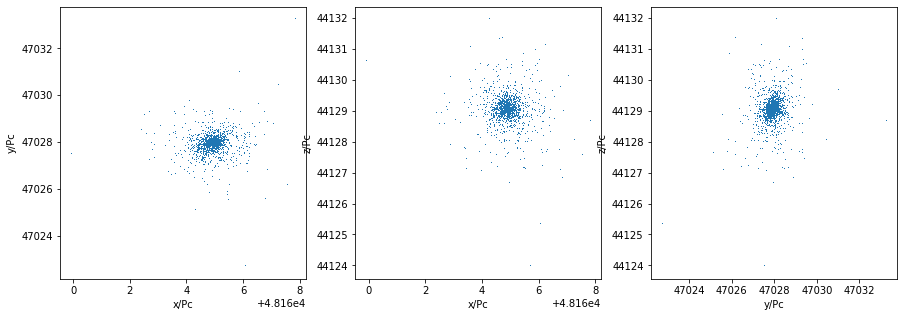

In [10]:
# lets take a look
pl.figure(figsize=(15,5))

x, y, z = cooG9[:,0], cooG9[:,1], cooG9[:,2]

pl.subplot(1,3,1)
pl.plot(x, y, marker=',',ls='')
pl.xlabel('x/Pc')
pl.ylabel('y/Pc')

pl.subplot(1,3,2)
pl.plot(x, z, marker=',',ls='')
pl.xlabel('x/Pc')
pl.ylabel('z/Pc')

pl.subplot(1,3,3)
pl.plot(y, z, marker=',',ls='')
pl.xlabel('y/Pc')
pl.ylabel('z/Pc')

In [11]:
# that looks good
# ok, now an histogram
cent = grou['SubGroupPos'][1]
cent

array([48164.844, 47027.96 , 44129.06 ], dtype=float32)

Text(0, 0.5, 'z/Pc')

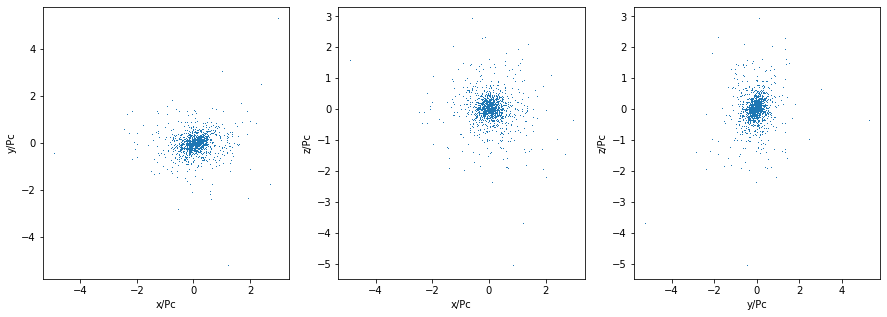

In [12]:
dcen = cooG9 - cent

pl.figure(figsize=(15,5))

x, y, z = dcen[:,0], dcen[:,1], dcen[:,2]

pl.subplot(1,3,1)
pl.plot(x, y, marker=',',ls='')
pl.xlabel('x/Pc')
pl.ylabel('y/Pc')

pl.subplot(1,3,2)
pl.plot(x, z, marker=',',ls='')
pl.xlabel('x/Pc')
pl.ylabel('z/Pc')

pl.subplot(1,3,3)
pl.plot(y, z, marker=',',ls='')
pl.xlabel('y/Pc')
pl.ylabel('z/Pc')

Text(0.5, 0, 'r_cen/pc')

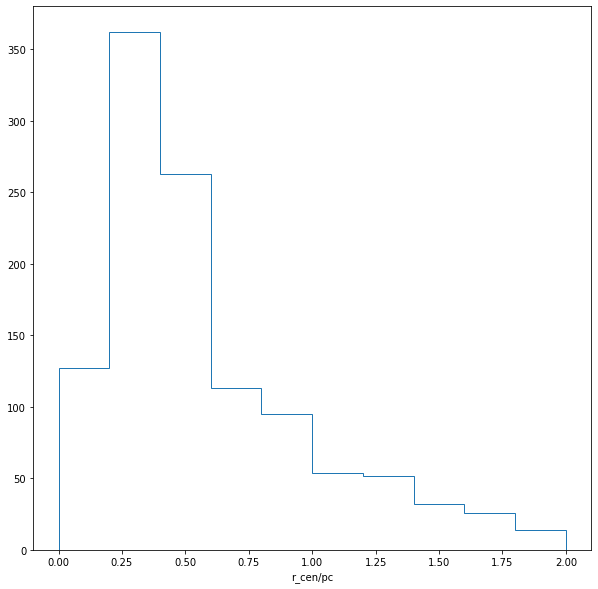

In [13]:
rat = np.sqrt(x**2+y**2+z**2)

pl.figure(figsize=(10,10))

pl.hist(rat, histtype='step', range=(0,2), bins=10)
pl.xlabel('r_cen/pc')

In [14]:
# ok, lets take a look at the metalicities, a few ones
metG9 = stars['Abundances'][offPt4[0]:offPt4[1]]
metG9.shape

(1192, 12)

In [15]:
He, C, Mg, O, Fe = metG9[:,0], metG9[:,1], metG9[:,2], metG9[:,3], metG9[:,4]

HeT = sp.binned_statistic(rat, He, range=(0,2))[0]
HeE = sp.binned_statistic(rat, He, range=(0,2), statistic='std')[0]/np.sqrt(sp.binned_statistic(rat, He, range=(0,2), statistic='count')[0])

CT = sp.binned_statistic(rat, C, range=(0,2))[0]
CE = sp.binned_statistic(rat, C, range=(0,2), statistic='std')[0]/np.sqrt(sp.binned_statistic(rat, C, range=(0,2), statistic='count')[0])

MgT = sp.binned_statistic(rat, Mg, range=(0,2))[0]
MgE = sp.binned_statistic(rat, Mg, range=(0,2), statistic='std')[0]/np.sqrt(sp.binned_statistic(rat, Mg, range=(0,2), statistic='count')[0])

OT = sp.binned_statistic(rat, O, range=(0,2))[0]
OE = sp.binned_statistic(rat, O, range=(0,2), statistic='std')[0]/np.sqrt(sp.binned_statistic(rat, O, range=(0,2), statistic='count')[0])

FeT, edg, nn = sp.binned_statistic(rat, Fe, range=(0,2))
FeE = sp.binned_statistic(rat, Fe, range=(0,2), statistic='std')[0]/np.sqrt(sp.binned_statistic(rat, Fe, range=(0,2), statistic='count')[0])

x = .5*(edg[0:-1]+edg[1:])

Text(0, 0.5, 'Abundances')

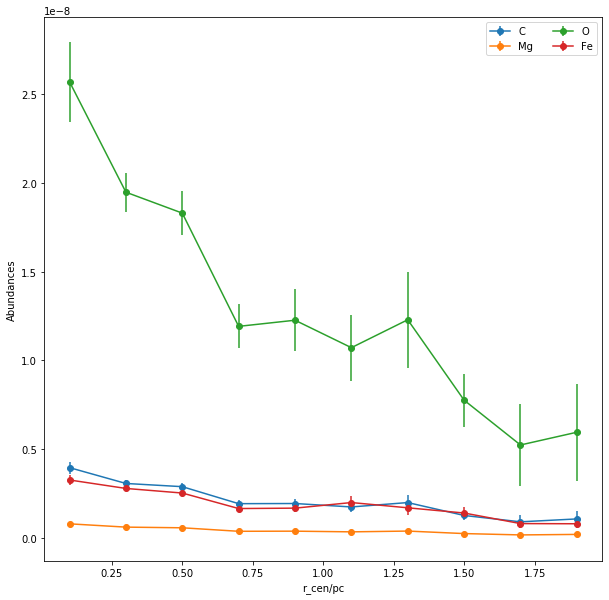

In [16]:
pl.figure(figsize=(10,10))

#pl.errorbar(x, HeT, yerr=HeE, marker='o', label='He')
pl.errorbar(x, CT, yerr=CE, marker='o', label='C')
pl.errorbar(x, MgT, yerr=MgE, marker='o', label='Mg')
pl.errorbar(x, OT, yerr=OE, marker='o', label='O')
pl.errorbar(x, FeT, yerr=FeE, marker='o', label='Fe')


pl.legend(loc='best', ncol=2)
pl.xlabel('r_cen/pc')
pl.ylabel('Abundances')